# Sales Trends Visualization

In [ ]:
# this is all about sales.

In [ ]:
# importing requred pakages

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Monthly sales trends over the past year

In [ ]:
# pointing requred datasets

In [3]:
path_orders = r"C:\Users\Vinayak\Data Analyst - Raw Data (1)\formatted_datasets\orders_formatted.csv"
path_customers = r"C:\Users\Vinayak\Data Analyst - Raw Data (1)\formatted_datasets\customers_formatted.csv"
path_products = r"C:\Users\Vinayak\Data Analyst - Raw Data (1)\formatted_datasets\products_std_fotmatted.csv"
path_order_items = r"C:\Users\Vinayak\Data Analyst - Raw Data (1)\Senior Data Analyst - Raw Data\order_items.csv"
path_cust_rating = r"C:\Users\Vinayak\Data Analyst - Raw Data (1)\formatted_datasets\customer_reviews_formatted.csv"

In [ ]:
# creating requred dataframes

In [5]:
df_orders = pd.read_csv(path_orders)
df_customers = pd.read_csv(path_customers)
df_products = pd.read_csv(path_products)
df_order_items = pd.read_csv(path_order_items)
df_cust_rating = pd.read_csv(path_cust_rating)

In [7]:
df_orders.head()

,order_id,customer_id,order_date,total_amount,status
0,1,101,2023-01-05,250,completed
1,2,102,2023-01-07,150,cancelled
2,3,103,2023-01-10,300,completed
3,4,101,2023-02-12,500,completed
4,5,104,2023-02-20,400,completed


In [ ]:
# creating a new dataset for analysis

In [7]:
df_monthly_sales = df_orders.copy()
df_monthly_sales.head()

,order_id,customer_id,order_date,total_amount,status
0,1,101,2023-01-05,250,completed
1,2,102,2023-01-07,150,cancelled
2,3,103,2023-01-10,300,completed
3,4,101,2023-02-12,500,completed
4,5,104,2023-02-20,400,completed


In [ ]:
# preparing dataframe
# standerdising date values
# aggrigating the date to month.
# aggrigating the sales by month

In [9]:
df_monthly_sales['order_date'] = pd.to_datetime(df_monthly_sales['order_date'])
df_monthly_sales['month'] = df_monthly_sales['order_date'].dt.to_period('M')
df_monthly_sales_agg = df_monthly_sales.groupby('month')['total_amount'].sum().reset_index()
df_monthly_sales_agg['month'] = df_monthly_sales_agg['month'].dt.to_timestamp()
df_monthly_sales_agg

,month,total_amount
0,2023-01-01,700
1,2023-02-01,900
2,2023-03-01,1070
3,2023-04-01,400
4,2023-05-01,700
5,2023-06-01,900
6,2023-07-01,2050
7,2023-08-01,450
8,2023-09-01,1250
9,2023-10-01,700


In [ ]:
# plotting line grapghbthat shows monthly trend over year

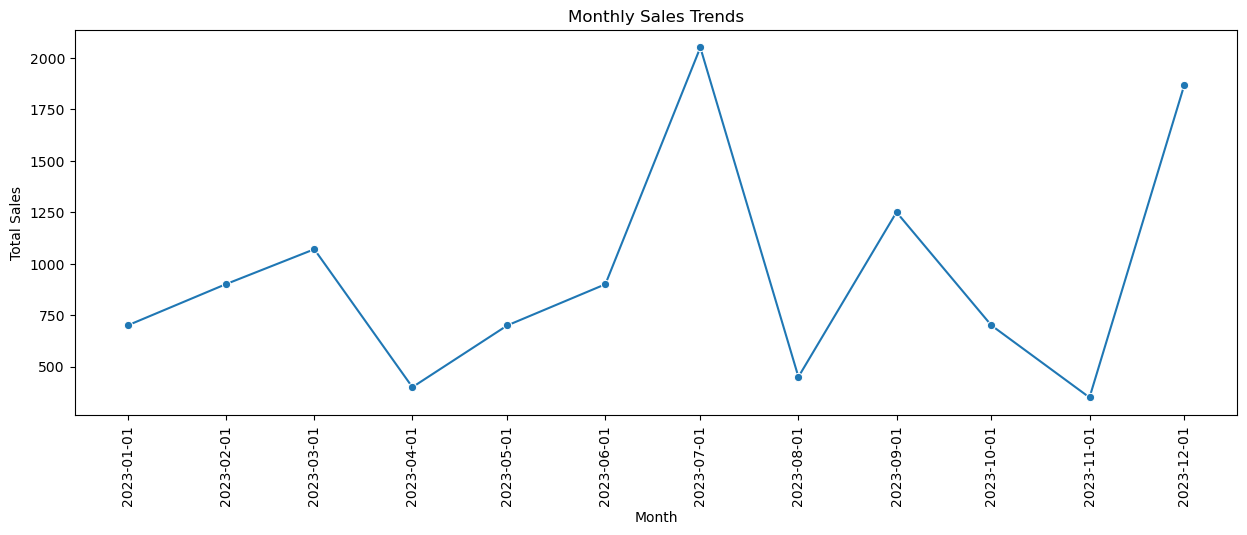

In [13]:
fig, axes = plt.subplots(1, 1, figsize=(15, 5))
#plt.figure(figsize=(15, 5))
sns.lineplot(x="month", y="total_amount", data=df_monthly_sales_agg, marker="o" , legend = 'full')
plt.xticks(df_monthly_sales_agg['month'],rotation=90)
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.title("Monthly Sales Trends")
plt.savefig(r"C:\Users\Vinayak\Data Analyst - Raw Data (1)\graphs_and_visuals\monthly_sales.png", dpi=300, bbox_inches="tight")
plt.show()

# Distribution of sales by product category

In [ ]:
# second most sigificant sales report is sales by category

In [ ]:
# preparing sales dataset by merging orders and order items with products

In [15]:
df_merege = df_order_items.merge(df_orders, on = 'order_id')
df_merege.head()

,order_id,product_id,quantity,customer_id,order_date,total_amount,status
0,1,1,2,101,2023-01-05,250,completed
1,1,3,1,101,2023-01-05,250,completed
2,2,4,1,102,2023-01-07,150,cancelled
3,3,6,1,103,2023-01-10,300,completed
4,3,8,1,103,2023-01-10,300,completed


In [17]:
df_sales = df_merege.merge(df_products, on = 'product_id', how = 'left')
df_sales.head()

,order_id,product_id,quantity,customer_id,order_date,total_amount,status,product_name,category,price,price_logged
0,1,1,2,101,2023-01-05,250,completed,Wireless Mouse,Electronics,25,3.258097
1,1,3,1,101,2023-01-05,250,completed,Phone Case,Accessories,15,2.772589
2,2,4,1,102,2023-01-07,150,cancelled,Headphones,Electronics,100,4.615121
3,3,6,1,103,2023-01-10,300,completed,Smartwatch,Electronics,150,5.017280
4,3,8,1,103,2023-01-10,300,completed,Laptop,Electronics,1000,6.908755


In [ ]:
# aggrigating sales by category

In [19]:
df_sales_agg = df_sales.groupby('category')['total_amount'].sum().reset_index()
df_sales_agg

,category,total_amount
0,Accessories,700
1,Appliances,4150
2,Clothing,350
3,Electronics,6270
4,Furniture,2520


In [ ]:
# plotting sales graph by category

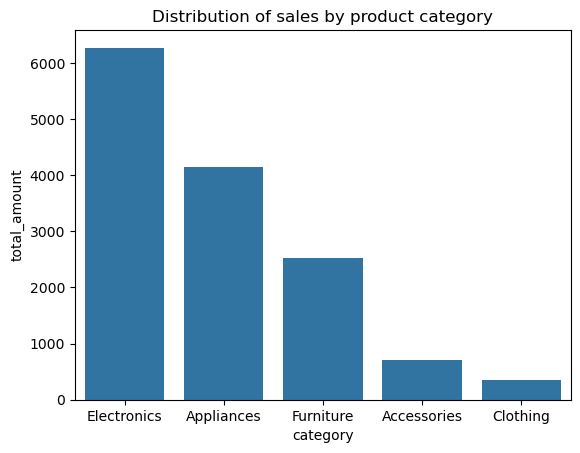

In [25]:
df_sales_agg_sorted = df_sales_agg.sort_values(by='total_amount', ascending=False)
sns.barplot(x=df_sales_agg_sorted['category'], y=df_sales_agg_sorted['total_amount'],)
# plt.xticks(rotation=90)
plt.title("Distribution of sales by product category")
plt.savefig(r"C:\Users\Vinayak\Data Analyst - Raw Data (1)\graphs_and_visuals\category_sales.png", dpi=300, bbox_inches="tight")
plt.show()


In [ ]:
# checking category wise order counts

In [ ]:
# aggrigating order count and grouping by category

In [29]:
df_ord_freq = df_sales.groupby('category')['order_id'].count().reset_index()
df_ord_freq

,category,order_id
0,Accessories,2
1,Appliances,9
2,Clothing,2
3,Electronics,17
4,Furniture,7


In [ ]:
# plotting bar grapgh

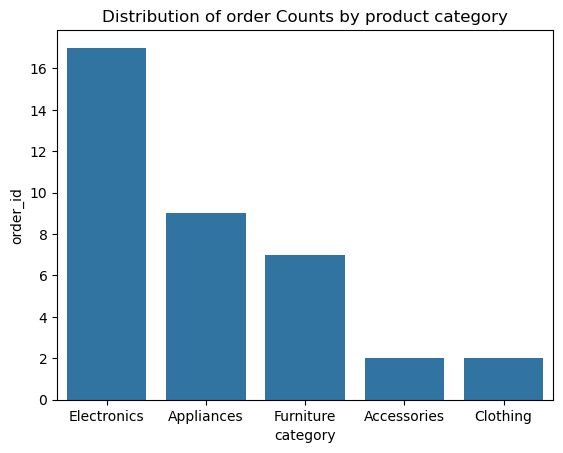

In [33]:
df_ord_freq_sorted = df_ord_freq.sort_values(by='order_id', ascending=False)
sns.barplot(x=df_ord_freq_sorted['category'], y=df_ord_freq_sorted['order_id'],)
#plt.xticks(rotation=90)
plt.title("Distribution of order Counts by product category")
plt.savefig(r"C:\Users\Vinayak\Data Analyst - Raw Data (1)\graphs_and_visuals\category_order.png", dpi=300, bbox_inches="tight")
plt.show()

# Customer Segmentation Based on Purchase Frequency

In [ ]:
# Group customers based on how often they make purchases. 
# This helps identify loyal customers, occasional buyers, and inactive customers.

In [39]:
df_customers.head()

,customer_id,name,email,location,signup_date,birthdate
0,101,John Doe,john.doe@email.com,New York,2021-01-01,1990-05-14
1,102,Jane Smith,jane.smith@email.com,Los Angeles,2021-01-10,1985-11-22
2,103,Emily Davis,emily.davis@email.com,Chicago,2022-03-15,1992-07-30
3,104,Michael Brown,michael.brown@email.com,San Francisco,2020-06-10,1988-12-01
4,105,Amy White,amy.white@email.com,Miami,2021-08-22,1991-02-10


In [41]:
df_orders.head()

,order_id,customer_id,order_date,total_amount,status
0,1,101,2023-01-05,250,completed
1,2,102,2023-01-07,150,cancelled
2,3,103,2023-01-10,300,completed
3,4,101,2023-02-12,500,completed
4,5,104,2023-02-20,400,completed


In [ ]:
# after loading requred datafarmes, merging them togather

In [43]:
df_cust_seg=df_orders.merge(df_customers, on = 'customer_id', how='left')
df_cust_seg.head()

,order_id,customer_id,order_date,total_amount,status,name,email,location,signup_date,birthdate
0,1,101,2023-01-05,250,completed,John Doe,john.doe@email.com,New York,2021-01-01,1990-05-14
1,2,102,2023-01-07,150,cancelled,Jane Smith,jane.smith@email.com,Los Angeles,2021-01-10,1985-11-22
2,3,103,2023-01-10,300,completed,Emily Davis,emily.davis@email.com,Chicago,2022-03-15,1992-07-30
3,4,101,2023-02-12,500,completed,John Doe,john.doe@email.com,New York,2021-01-01,1990-05-14
4,5,104,2023-02-20,400,completed,Michael Brown,michael.brown@email.com,San Francisco,2020-06-10,1988-12-01


In [ ]:
# aggrigating customer datasets based on customer id and order frequency

In [45]:
df_cust_agg = df_cust_seg.groupby('customer_id')['order_id'].count().reset_index()
df_cust_agg.rename(columns={'order_id':'Order Frequency'}, inplace=True)
df_cust_agg

,customer_id,Order Frequency
0,101,4
1,102,3
2,103,3
3,104,3
4,105,3
5,106,3
6,107,3
7,108,2
8,109,2
9,110,2


In [ ]:
# standerdsing the rating range

In [47]:
scaler = StandardScaler()
df_cust_agg['scaled_count'] = scaler.fit_transform(df_cust_agg[['Order Frequency']])

In [ ]:
# clustering the customers into 3 categories

In [53]:
kmeans = KMeans(n_clusters=3, random_state=42)
df_cust_agg['segment'] = kmeans.fit_predict(df_cust_agg[['scaled_count']])

C:\Users\Vinayak\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [ ]:
# plotting box plot

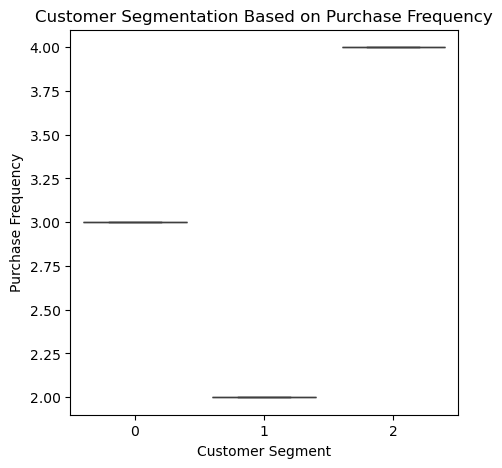

In [57]:
plt.figure(figsize=(5, 5))
sns.boxplot(x='segment', y='Order Frequency', data=df_cust_agg)
plt.xlabel("Customer Segment")
plt.ylabel("Purchase Frequency")
plt.title("Customer Segmentation Based on Purchase Frequency")
plt.savefig(r"C:\Users\Vinayak\Data Analyst - Raw Data (1)\graphs_and_visuals\cust_order.png", dpi=300, bbox_inches="tight")
plt.show()


# Final Dashboard

C:\Users\Vinayak\AppData\Local\Temp\ipykernel_10580\3543498708.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0,0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=90)
C:\Users\Vinayak\AppData\Local\Temp\ipykernel_10580\3543498708.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0,1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=90)
C:\Users\Vinayak\AppData\Local\Temp\ipykernel_10580\3543498708.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1,0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=90)


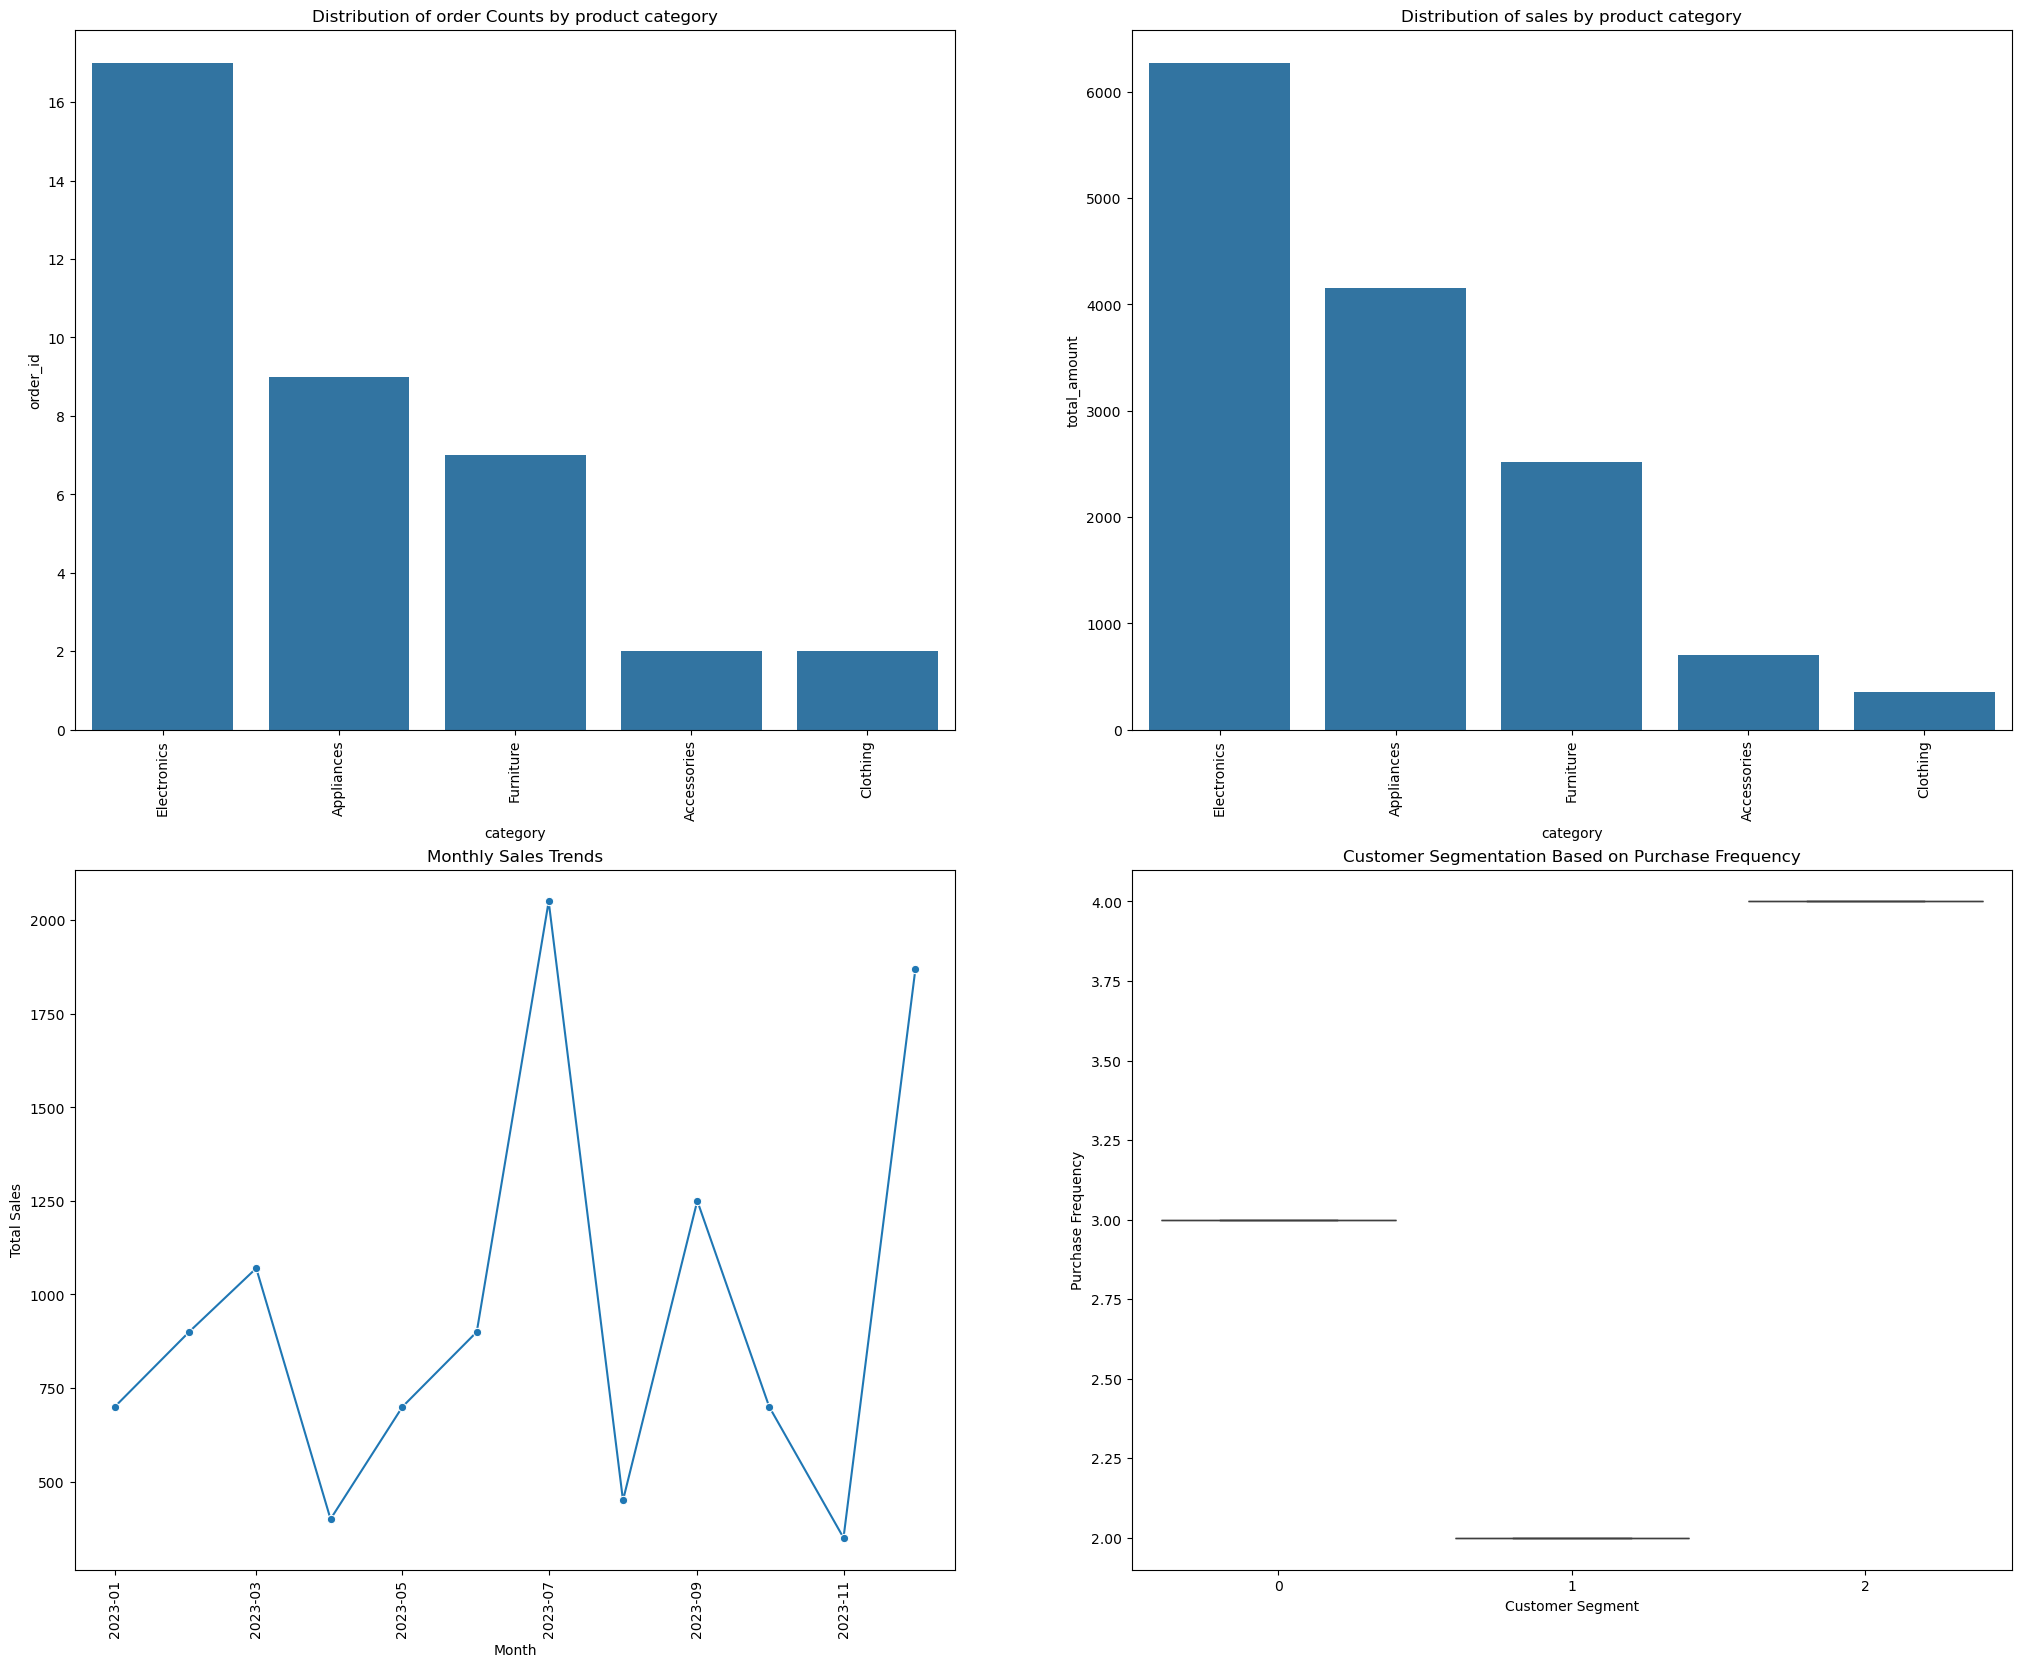

In [59]:
fig, axes = plt.subplots(2, 2, figsize=(25,20))  # 1 row, 2 columns



df_ord_freq_sorted = df_ord_freq.sort_values(by='order_id', ascending=False)
sns.barplot(x=df_ord_freq_sorted['category'], y=df_ord_freq_sorted['order_id'],ax=axes[0,0])
axes[0,0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=90)
axes[0,0].set_title("Distribution of order Counts by product category")

df_sales_agg_sorted = df_sales_agg.sort_values(by='total_amount', ascending=False)
sns.barplot(x=df_sales_agg_sorted['category'], y=df_sales_agg_sorted['total_amount'], ax=axes[0,1])
axes[0,1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=90)
axes[0,1].set_title("Distribution of sales by product category")

sns.lineplot(x="month", y="total_amount", data=df_monthly_sales_agg, marker="o" , legend = 'full', ax=axes[1,0])
axes[1,0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=90)
axes[1,0].set_xlabel("Month")
axes[1,0].set_ylabel("Total Sales")
axes[1,0].set_title("Monthly Sales Trends")

#plt.figure(figsize=(8, 5))
sns.boxplot(x='segment', y='Order Frequency', data=df_cust_agg, ax=axes[1,1])
axes[1,1].set_xlabel("Customer Segment")
axes[1,1].set_ylabel("Purchase Frequency")
axes[1,1].set_title("Customer Segmentation Based on Purchase Frequency")

plt.savefig(r"C:\Users\Vinayak\Data Analyst - Raw Data (1)\graphs_and_visuals\sale_dash.png", dpi=300, bbox_inches="tight")


plt.show()